In [5]:
# import packages for data analysis and visualization
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# read csv file from local drive
ev_df = pd.read_csv('./Documents/DataAnalytics/ElectricCarData_Clean.csv')

In [7]:
# convert RapidCharge categorical values to binary values for regression analysis
ev_df['RapidCharge'] = pd.Categorical(ev_df['RapidCharge']).codes

In [8]:
# convert PowerTrain categorical values to one-hot encoding for regression analysis
ev_df = pd.get_dummies(ev_df, columns=['PowerTrain'], prefix='Category')

In [9]:
# convert Category_All Wheel Drive, Category_Front Wheel Drive, and Category_Rear Wheel Drive columns to binary values for regression analysis
columns_to_convert = ['Category_All Wheel Drive', 'Category_Front Wheel Drive', 'Category_Rear Wheel Drive']

for column in columns_to_convert:
    ev_df[column] = ev_df[column].astype(int)

In [10]:
# identify independent variables to predict the dependent variable (Price)
X = sm.add_constant(ev_df[['Accel_Sec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 
                        'Seats', 'Category_All Wheel Drive', 'Category_Front Wheel Drive', 'Category_Rear Wheel Drive']])

# fit the regression model to predict Price
model = sm.OLS(ev_df['PriceEuro'], X).fit()

# print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              PriceEuro   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     31.77
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           1.13e-24
Time:                        21:44:47   Log-Likelihood:                -1148.4
No. Observations:                 103   AIC:                             2317.
Df Residuals:                      93   BIC:                             2343.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

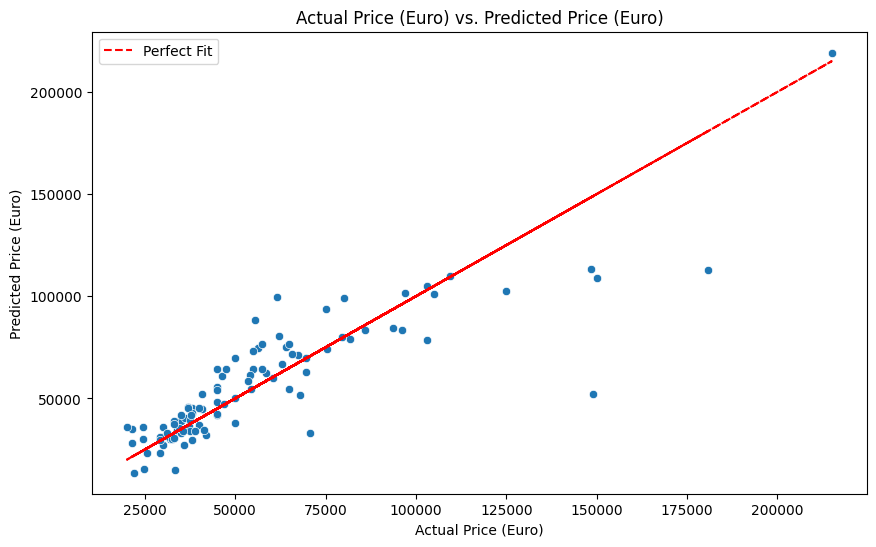

In [25]:
# visualize the actual vs predicted values

# generate predicted price using model
predictions = model.predict(X)

# create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ev_df['PriceEuro'], y=predictions)
plt.plot(ev_df['PriceEuro'], ev_df['PriceEuro'], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Price (Euro)')
plt.ylabel('Predicted Price (Euro)')
plt.title('Actual Price (Euro) vs. Predicted Price (Euro)')
plt.legend()
plt.show()